# Correlating danger with census tract demographics

## Load in baseline information

In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DANGER_DF_FILEPATH = "../../pipeline_data/2019/danger_by_node_id.pkl.gz"
GRAPH_FILEPATH = "../../pipeline_data/2019/target_map_consolidated.graphml"

In [3]:
danger_node_df = pd.read_pickle(DANGER_DF_FILEPATH)

In [4]:
G = ox.io.load_graphml(GRAPH_FILEPATH)

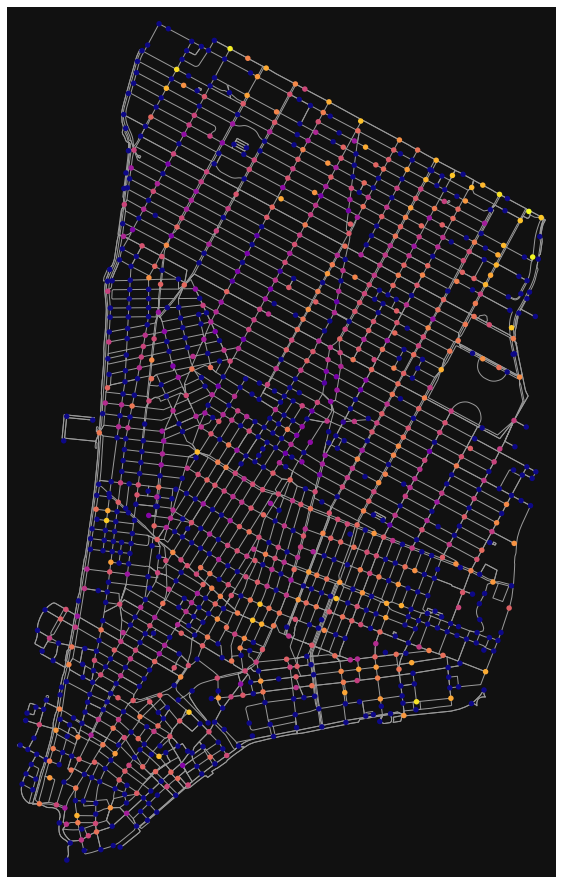

(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

In [5]:
nx.set_node_attributes(G, danger_node_df.DANGER, "danger")

nc = ox.plot.get_node_colors_by_attr(G, "danger", cmap="plasma")

ox.plot.plot_graph(
    G,
    figsize=(16, 16),
    node_size=30,
    node_color=nc
)

In [8]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID
0,0.000000,0.000000,[42421828],002800
1,0.000000,0.000000,[42430942],002400
2,2.768670,0.000872,[42430938],002800
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300
...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300
1259,0.000000,0.000000,[42446678],009900
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900
1261,0.000000,0.000000,[8288560711],009900


In [9]:
danger_node_df["id"] = danger_node_df.index

In [10]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id
0,0.000000,0.000000,[42421828],002800,0
1,0.000000,0.000000,[42430942],002400,1
2,2.768670,0.000872,[42430938],002800,2
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4
...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258
1259,0.000000,0.000000,[42446678],009900,1259
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260
1261,0.000000,0.000000,[8288560711],009900,1261


## Load census tract <> node mapping

In [11]:
CENSUS_TO_NODE_FILEPATH = "../../pipeline_data/2019/node_id_census_tract_key.pkl.gz"

In [12]:
census_to_node_mapping = pd.read_pickle(CENSUS_TO_NODE_FILEPATH)

In [13]:
census_to_node_mapping

,ct2010
osmid,
42421828,002800
42421837,002800
42430924,002800
42430938,002800
42436957,002800
...,...
3655974177,002000
3783088880,002000
3884582047,002000


In [14]:
census_to_node_mapping.loc[42421828]["ct2010"]

'002800'

In [15]:
type(census_to_node_mapping.loc[42421828]["ct2010"])

str

### Note
The census tracts are of type string

## Load census tract race and income data

In [16]:
CENSUS_RACE_INCOME_CLEAN_FILEPATH = "../../data/census_race_income_clean.csv"

In [17]:
census_race_income_clean_df = pd.read_csv(CENSUS_RACE_INCOME_CLEAN_FILEPATH)

In [18]:
census_race_income_clean_df

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,...,ASIAN_PERCENT,HISPANIC_PERCENT,LESS_THAN_10000_PERCENT,100000_TO_124999_PERCENT,125000_TO_149999_PERCENT,150000_TO_199999_PERCENT,200000_OR_MORE_PERCENT,10000_TO_24999_PERCENT,25000_TO_49999_PERCENT,50000_TO_99999_PERCENT
0,0,1,1009800,Manhattan,I,9800,98.00,MN19,Turtle Bay-East Midtown,3808,...,10.832649,9.832922,3.206035,5.869873,5.940594,8.180104,37.364451,11.197548,7.260726,20.980669
1,1,1,1010200,Manhattan,I,10200,102.00,MN17,Midtown-Midtown South,3807,...,1.639344,11.475410,7.575758,12.121212,27.272727,0.000000,6.060606,39.393939,0.000000,7.575758
2,2,1,1010400,Manhattan,I,10400,104.00,MN17,Midtown-Midtown South,3807,...,19.235512,9.001233,4.214559,14.559387,10.153257,7.854406,33.141762,8.045977,3.831418,18.199234
3,3,1,1011300,Manhattan,I,11300,113.00,MN17,Midtown-Midtown South,3807,...,33.673469,0.000000,20.754717,9.433962,18.867925,9.433962,5.660377,0.000000,13.207547,22.641509
4,4,1,1013000,Manhattan,I,13000,130.00,MN40,Upper East Side-Carnegie Hill,3805,...,4.345202,5.461678,1.341532,5.701509,0.950252,8.887647,49.916154,2.794857,10.732253,19.675797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,1,1014300,Manhattan,I,14300,143.00,MN99,park-cemetery-etc-Manhattan,3806,...,0.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,284,1,1022102,Manhattan,E,22102,221.02,MN03,Central Harlem North-Polo Grounds,3803,...,5.105566,13.243762,5.746141,7.204117,14.408233,11.663808,14.236707,12.692967,10.548885,23.499142
285,285,1,1022700,Manhattan,E,22700,227.00,MN04,Hamilton Heights,3802,...,5.289383,36.297432,8.432631,14.573786,6.003666,8.111824,7.057745,22.318973,13.428048,20.073327
286,286,1,1014802,Manhattan,I,14802,148.02,MN40,Upper East Side-Carnegie Hill,3805,...,10.362854,12.376999,3.714020,9.501702,5.075828,13.679975,33.735686,5.044878,9.285051,19.962860


In [19]:
census_race_income_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                288 non-null    int64  
 1   boro_code                 288 non-null    int64  
 2   boro_ct201                288 non-null    int64  
 3   boro_name                 288 non-null    object 
 4   cdeligibil                288 non-null    object 
 5   ct2010                    288 non-null    int64  
 6   ctlabel                   288 non-null    float64
 7   ntacode                   288 non-null    object 
 8   ntaname                   288 non-null    object 
 9   puma                      288 non-null    int64  
 10  shape_area                288 non-null    float64
 11  shape_leng                288 non-null    float64
 12  geometry                  288 non-null    object 
 13  CENSUS_TRACT              288 non-null    int64  
 14  RACE_TOTAL

## Census tract <> OSMnx Mapping
Using the `census_to_node_mapping` DataFrame, lookup all census tracts in the danger DataFrame. Note that the danger is calculated for a consolidated map, so we will look up the census tract by iterating over the `"OLD_NODE_IDS"` of each consolidated node. This can yield more than one census tract per node if the node is a combination of multiple `"OLD_NODE_IDS"`

In [20]:
def census_tract_danger_lookup(_x, census_to_node_mapping_df):
    old_ids = _x["OLD_NODE_IDS"]
    
    census_tracts = []
    for i in old_ids:
        census_tract = [census_to_node_mapping_df.loc[i]["ct2010"]]
        census_tracts.extend(census_tract)
        
    if len(set(census_tracts)) == 1:
        return census_tracts[0]
    
    elif len(set(census_tracts)) > 1:
        return census_tracts

    return 0

In [21]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id
0,0.000000,0.000000,[42421828],002800,0
1,0.000000,0.000000,[42430942],002400,1
2,2.768670,0.000872,[42430938],002800,2
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4
...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258
1259,0.000000,0.000000,[42446678],009900,1259
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260
1261,0.000000,0.000000,[8288560711],009900,1261


In [22]:
danger_node_df["census_tract"] = danger_node_df.apply(
    census_tract_danger_lookup,
    args=(census_to_node_mapping,),
    axis=1
)

In [23]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id,census_tract
0,0.000000,0.000000,[42421828],002800,0,002800
1,0.000000,0.000000,[42430942],002400,1,002400
2,2.768670,0.000872,[42430938],002800,2,002800
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3,002800
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4,"[006300, 006300, 006300, 006300, 005900, 00590..."
...,...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258,001300
1259,0.000000,0.000000,[42446678],009900,1259,009900
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260,006900
1261,0.000000,0.000000,[8288560711],009900,1261,009900


### Analysis
This is a little messed up because we can see some edges where there is an overlap of census tracts at consolidated nodes, but we could probably just alleviate this by averaging the census tract values

In [24]:
percent_income_column_names = [
    "LESS_THAN_10000_PERCENT",
    "100000_TO_124999_PERCENT",
    "125000_TO_149999_PERCENT",
    "150000_TO_199999_PERCENT",
    "200000_OR_MORE_PERCENT",
    "10000_TO_24999_PERCENT",
    "25000_TO_49999_PERCENT",
    "50000_TO_99999_PERCENT"
]

In [25]:
def get_avg_percent_incomes(_x, census_df, col_name):
    census_tract = _x["census_tract"]
    
    if type(census_tract) != list:
        census_tract = [census_tract]
    
    income_band_percent = []
    for i in census_tract:
        income_band_percent.extend(census_df[census_df["ct2010"]==int(i)][col_name].to_list())
        
    income_band_percent = np.nan_to_num(income_band_percent)
    
    return np.mean(income_band_percent)

In [26]:
for i in percent_income_column_names:
    danger_node_df["x"+i] = danger_node_df.apply(
        get_avg_percent_incomes,
        args=(census_race_income_clean_df, i,),
        axis=1
    )

In [27]:
census_race_income_clean_df[census_race_income_clean_df["ct2010"]=="10200"]["LESS_THAN_10000_PERCENT"].to_list()

[]

In [28]:
census_race_income_clean_df["ct2010"]

0       9800
1      10200
2      10400
3      11300
4      13000
       ...  
283    14300
284    22102
285    22700
286    14802
287    14801
Name: ct2010, Length: 288, dtype: int64

In [29]:
danger_node_df["census_tract"]

0                                                  002800
1                                                  002400
2                                                  002800
3                                                  002800
4       [006300, 006300, 006300, 006300, 005900, 00590...
                              ...                        
1258                                               001300
1259                                               009900
1260                                               006900
1261                                               009900
1262                                               009900
Name: census_tract, Length: 1263, dtype: object

Note that I had to add a leading "x" here because statsmodels does not like labels that start with a numeral

In [30]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id,census_tract,xLESS_THAN_10000_PERCENT,x100000_TO_124999_PERCENT,x125000_TO_149999_PERCENT,x150000_TO_199999_PERCENT,x200000_OR_MORE_PERCENT,x10000_TO_24999_PERCENT,x25000_TO_49999_PERCENT,x50000_TO_99999_PERCENT
0,0.000000,0.000000,[42421828],002800,0,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
1,0.000000,0.000000,[42430942],002400,1,002400,29.513514,0.000000,0.000000,0.000000,0.486486,37.513514,23.513514,8.972973
2,2.768670,0.000872,[42430938],002800,2,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4,"[006300, 006300, 006300, 006300, 005900, 00590...",4.591767,6.651157,9.354719,10.001125,38.508426,6.236465,8.766959,15.889383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258,001300,1.512801,10.822343,6.749418,17.067494,39.410396,2.754073,7.370054,14.313421
1259,0.000000,0.000000,[42446678],009900,1259,009900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260,006900,0.000000,7.430618,3.312444,10.743062,56.580125,5.371531,4.028648,12.533572
1261,0.000000,0.000000,[8288560711],009900,1261,009900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399


In [31]:
X = danger_node_df["xLESS_THAN_10000_PERCENT"].values

In [32]:
y = danger_node_df["DANGER"].values

Sweet sweet, now we can look for a correlation between the danger and the average percent of census tract residents making under $10,000

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)

LinearRegression()

In [35]:
reg.coef_

array([0.00110762])

In [36]:
reg.intercept_

1.7526793387647892

In [37]:
danger_node_df.columns

Index(['DANGER', 'CRASH_AVG', 'OLD_NODE_IDS', 'CENSUS_TRACT_ID', 'id',
       'census_tract', 'xLESS_THAN_10000_PERCENT', 'x100000_TO_124999_PERCENT',
       'x125000_TO_149999_PERCENT', 'x150000_TO_199999_PERCENT',
       'x200000_OR_MORE_PERCENT', 'x10000_TO_24999_PERCENT',
       'x25000_TO_49999_PERCENT', 'x50000_TO_99999_PERCENT'],
      dtype='object')

In [38]:
import statsmodels.api as sm

fitted_model = sm.OLS.from_formula(
    'DANGER ~ xLESS_THAN_10000_PERCENT + x100000_TO_124999_PERCENT + x125000_TO_149999_PERCENT + x150000_TO_199999_PERCENT + x200000_OR_MORE_PERCENT + x10000_TO_24999_PERCENT + x25000_TO_49999_PERCENT + x50000_TO_99999_PERCENT',
    data=danger_node_df
).fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DANGER   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.096
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           7.83e-05
Time:                        10:46:05   Log-Likelihood:                -2544.5
No. Observations:                1263   AIC:                             5107.
Df Residuals:                    1254   BIC:                             5153.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.0727      1.211      0.886      0.376      -1.303       3.448
xLESS_THAN_10000_PERCENT     -0.0106      0.020     -0.530      0.596      -0.050       0.029
x100000_TO_124999_PERCENT     0.0116      0.020      0.577      0.564      -0.028       0.051
x125000_TO_149999_PERCENT     0.0748      0.024      3.125      0.002       0.028       0.122
x150000_TO_199999_PERCENT    -0.0053      0.020     -0.266      0.790      -0.045       0.034
x200000_OR_MORE_PERCENT      -0.0069      0.013     -0.540      0.589      -0.032       0.018
x10000_TO_24999_PERCENT       0.0081      0.015      0.530      0.596      -0.022       0.038
x25000_TO_49999_PERCENT      -0.0095      0.016     -0.580      0.562      -0.042       0.023
x50000_TO_99999_PERCENT       0.0293      0.015      1.926      0.054      -0.001       0.059
==============================================================================
Omnibus:                    27692.344   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.001
Skew:                           0.321   Prob(JB):                     5.31e-27
Kurtosis:                       1.626   Cond. No.                         987.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Median Income
Now, let's pull in the cleaned dataset for median income and look for correlations with danger

In [39]:
MEDIAN_INCOME_FILEPATH = "../../data/census_median_income_clean.csv"

In [40]:
median_income_df = pd.read_csv(MEDIAN_INCOME_FILEPATH)

In [41]:
median_income_df

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,MEDIAN_HOUSEHOLD_INCOME
0,0,1,1009800,Manhattan,I,9800,98.00,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,POLYGON ((-73.96432543478758 40.75638153099091...,9800,129167.0
1,1,1,1010200,Manhattan,I,10200,102.00,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...,10200,0.0
2,2,1,1010400,Manhattan,I,10400,104.00,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...,10400,125882.0
3,3,1,1011300,Manhattan,I,11300,113.00,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98411754823195 40.7548420534646,...",11300,95313.0
4,4,1,1013000,Manhattan,I,13000,130.00,MN40,Upper East Side-Carnegie Hill,3805,1.918145e+06,5807.972956,POLYGON ((-73.96147581181627 40.77432401139124...,13000,196964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,1,1014300,Manhattan,I,14300,143.00,MN99,park-cemetery-etc-Manhattan,3806,3.831238e+07,32721.097913,"POLYGON ((-73.9524609285142 40.79824249401064,...",14300,0.0
284,284,1,1022102,Manhattan,E,22102,221.02,MN03,Central Harlem North-Polo Grounds,3803,1.065534e+06,4893.839567,POLYGON ((-73.94516004829619 40.82087904397856...,22102,96154.0
285,285,1,1022700,Manhattan,E,22700,227.00,MN04,Hamilton Heights,3802,1.621656e+06,5486.855827,POLYGON ((-73.94292366846466 40.82326058674754...,22700,56818.0
286,286,1,1014802,Manhattan,I,14802,148.02,MN40,Upper East Side-Carnegie Hill,3805,1.351073e+06,4691.030751,POLYGON ((-73.95165920749083 40.78200767416538...,14802,137679.0


In [42]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id,census_tract,xLESS_THAN_10000_PERCENT,x100000_TO_124999_PERCENT,x125000_TO_149999_PERCENT,x150000_TO_199999_PERCENT,x200000_OR_MORE_PERCENT,x10000_TO_24999_PERCENT,x25000_TO_49999_PERCENT,x50000_TO_99999_PERCENT
0,0.000000,0.000000,[42421828],002800,0,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
1,0.000000,0.000000,[42430942],002400,1,002400,29.513514,0.000000,0.000000,0.000000,0.486486,37.513514,23.513514,8.972973
2,2.768670,0.000872,[42430938],002800,2,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4,"[006300, 006300, 006300, 006300, 005900, 00590...",4.591767,6.651157,9.354719,10.001125,38.508426,6.236465,8.766959,15.889383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258,001300,1.512801,10.822343,6.749418,17.067494,39.410396,2.754073,7.370054,14.313421
1259,0.000000,0.000000,[42446678],009900,1259,009900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260,006900,0.000000,7.430618,3.312444,10.743062,56.580125,5.371531,4.028648,12.533572
1261,0.000000,0.000000,[8288560711],009900,1261,009900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399


In [43]:
def get_median_income(_x, median_income_all):
    ct = _x["CENSUS_TRACT_ID"]
    return float(median_income_all[median_income_all["ct2010"]==int(ct)]["MEDIAN_HOUSEHOLD_INCOME"])

In [44]:
danger_node_df["median_income"] = danger_node_df.apply(get_median_income, args=(median_income_df,), axis=1)

In [45]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id,census_tract,xLESS_THAN_10000_PERCENT,x100000_TO_124999_PERCENT,x125000_TO_149999_PERCENT,x150000_TO_199999_PERCENT,x200000_OR_MORE_PERCENT,x10000_TO_24999_PERCENT,x25000_TO_49999_PERCENT,x50000_TO_99999_PERCENT,median_income
0,0.000000,0.000000,[42421828],002800,0,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969,44199.0
1,0.000000,0.000000,[42430942],002400,1,002400,29.513514,0.000000,0.000000,0.000000,0.486486,37.513514,23.513514,8.972973,14144.0
2,2.768670,0.000872,[42430938],002800,2,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969,44199.0
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969,44199.0
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4,"[006300, 006300, 006300, 006300, 005900, 00590...",4.591767,6.651157,9.354719,10.001125,38.508426,6.236465,8.766959,15.889383,156975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258,001300,1.512801,10.822343,6.749418,17.067494,39.410396,2.754073,7.370054,14.313421,171173.0
1259,0.000000,0.000000,[42446678],009900,1259,009900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399,141672.0
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260,006900,0.000000,7.430618,3.312444,10.743062,56.580125,5.371531,4.028648,12.533572,250001.0
1261,0.000000,0.000000,[8288560711],009900,1261,009900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399,141672.0


In [46]:
import statsmodels.api as sm

fitted_model = sm.OLS.from_formula(
    'DANGER ~ median_income',
    data=danger_node_df[danger_node_df["DANGER"]!=0]
).fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DANGER   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.81
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           3.00e-07
Time:                        10:46:06   Log-Likelihood:                -897.63
No. Observations:                 654   AIC:                             1799.
Df Residuals:                     652   BIC:                             1808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8226      0.090     42.572      0.000       3.646       3.999
median_income -3.455e-06   6.67e-07     -5.177      0.000   -4.76e-06   -2.14e-06
==============================================================================
Omnibus:                        0.508   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.438
Skew:                           0.062   Prob(JB):                        0.803
Kurtosis:                       3.029   Cond. No.                     3.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

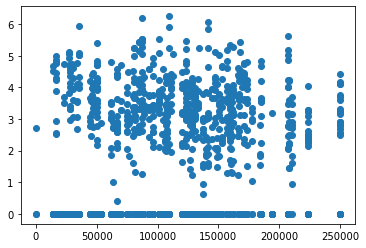

In [47]:
plt.figure()
plt.scatter(danger_node_df["median_income"], danger_node_df["DANGER"])
plt.show()

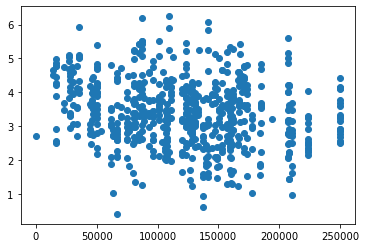

In [48]:
plt.figure()
plt.scatter(
    danger_node_df[danger_node_df["DANGER"]!=0]["median_income"],
    danger_node_df[danger_node_df["DANGER"]!=0]["DANGER"]
)

plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X = danger_node_df["median_income"].to_numpy()

In [52]:
scaled_med_income = scaler.fit_transform(X.reshape(-1, 1))

In [53]:
scaled_med_income

array([[-1.31296951],
       [-1.81449458],
       [-1.31296951],
       ...,
       [ 2.12122991],
       [ 0.31355365],
       [ 0.31355365]])

In [54]:
danger_node_df["scaled_med_income"] = scaled_med_income

In [55]:
danger_node_df.head()

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id,census_tract,xLESS_THAN_10000_PERCENT,x100000_TO_124999_PERCENT,x125000_TO_149999_PERCENT,x150000_TO_199999_PERCENT,x200000_OR_MORE_PERCENT,x10000_TO_24999_PERCENT,x25000_TO_49999_PERCENT,x50000_TO_99999_PERCENT,median_income,scaled_med_income
0,0.000000,0.000000,[42421828],002800,0,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969,44199.0,-1.312970
1,0.000000,0.000000,[42430942],002400,1,002400,29.513514,0.000000,0.000000,0.000000,0.486486,37.513514,23.513514,8.972973,14144.0,-1.814495
2,2.768670,0.000872,[42430938],002800,2,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969,44199.0,-1.312970
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3,002800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969,44199.0,-1.312970
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4,"[006300, 006300, 006300, 006300, 005900, 00590...",4.591767,6.651157,9.354719,10.001125,38.508426,6.236465,8.766959,15.889383,156975.0,0.568913


In [56]:
fitted_model = sm.OLS.from_formula(
    'DANGER ~ scaled_med_income',
    data=danger_node_df
).fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DANGER   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.487
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0343
Time:                        10:46:06   Log-Likelihood:                -2558.5
No. Observations:                1263   AIC:                             5121.
Df Residuals:                    1261   BIC:                             5131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.7605      0.052     34.078      0.000       1.659       1.862
scaled_med_income    -0.1094      0.052     -2.118      0.034      -0.211      -0.008
==============================================================================
Omnibus:                    11097.211   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.395
Skew:                           0.321   Prob(JB):                     2.94e-29
Kurtosis:                       1.556   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
fitted_model = sm.OLS.from_formula(
    'DANGER ~ scaled_med_income',
    data=danger_node_df[danger_node_df["DANGER"]!=0]
).fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DANGER   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.81
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           3.00e-07
Time:                        10:46:06   Log-Likelihood:                -897.63
No. Observations:                 654   AIC:                             1799.
Df Residuals:                     652   BIC:                             1808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3981      0.037     90.886      0.000       3.325       3.471
scaled_med_income    -0.2070      0.040     -5.177      0.000      -0.286      -0.129
==============================================================================
Omnibus:                        0.508   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.438
Skew:                           0.062   Prob(JB):                        0.803
Kurtosis:                       3.029   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""